In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# Load data
df = pd.read_csv('crime.csv')

df_crime = df.copy()

## Prepare Data for ML

In [2]:
# Fill in missing data
df_crime['HOUR'] = df_crime['HOUR'].fillna(25)
df_crime['NEIGHBOURHOOD'] = df_crime['NEIGHBOURHOOD'].fillna('N/A')
df_crime['HUNDRED_BLOCK'] = df_crime['HUNDRED_BLOCK'].fillna('N/A')

# Separate the incomplete dataset 
df_2017 = df_crime[(df_crime['YEAR'] >= 2017)] 
df_crime = df_crime[(df_crime['YEAR'] < 2017)]


# Add new features for further analysis
df_crime['Date'] = pd.to_datetime({'year':df_crime['YEAR'], 'month':df_crime['MONTH'], 'day':df_crime['DAY']})
df_crime['DayOfWeek'] = df_crime['Date'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_crime['Season'] = df_crime['MONTH'].apply(get_season)

df_crime['TimeOfDay'] = pd.cut(df_crime['HOUR'],
                                      bins=[0, 6, 12, 18, 24],
                                      labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Remove unnecessary columns
df_crime = df_crime.drop(['MINUTE','HUNDRED_BLOCK', 'X','Y','Date'], axis=1)

df_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DayOfWeek,Season,TimeOfDay
0,Other Theft,2003,5,12,16.0,Strathcona,49.269802,-123.083763,Monday,Spring,Afternoon
1,Other Theft,2003,5,7,15.0,Strathcona,49.269802,-123.083763,Wednesday,Spring,Afternoon
2,Other Theft,2003,4,23,16.0,Strathcona,49.269802,-123.083763,Wednesday,Spring,Afternoon
3,Other Theft,2003,4,20,11.0,Strathcona,49.269802,-123.083763,Sunday,Spring,Morning
4,Other Theft,2003,4,12,17.0,Strathcona,49.269802,-123.083763,Saturday,Spring,Afternoon


In [3]:
# Encode the TYPE column
label_encoder = LabelEncoder()
df_crime['TYPE'] = label_encoder.fit_transform(df_crime['TYPE'])

# Define features and target
X = df_crime.drop(columns=["TYPE"])
y = df_crime["TYPE"]

# Select numerical and categorical features
numerical_features = ["YEAR", "MONTH", "DAY", "HOUR", "Latitude", "Longitude"]
categorical_features = ["DayOfWeek", "Season", "TimeOfDay","NEIGHBOURHOOD"]

# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("label", OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training and evaluating: Dummy Classifier
Accuracy (Dummy Classifier): 32.46%

Classification Report:


/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.00      0.00      0.00      6587
                     Break and Enter Residential/Other       0.00      0.00      0.00     11949
                                              Homicide       0.00      0.00      0.00        34
                                              Mischief       0.00      0.00      0.00     13599
                              Offence Against a Person       0.00      0.00      0.00     10573
                                           Other Theft       0.00      0.00      0.00      9831
                                    Theft from Vehicle       0.32      1.00      0.49     33287
                                      Theft of Bicycle       0.00      0.00      0.00      4944
                                      Theft of Vehicle       0.00      0.00      0.00      7397
Vehicle Collision or Pedestrian Struck 

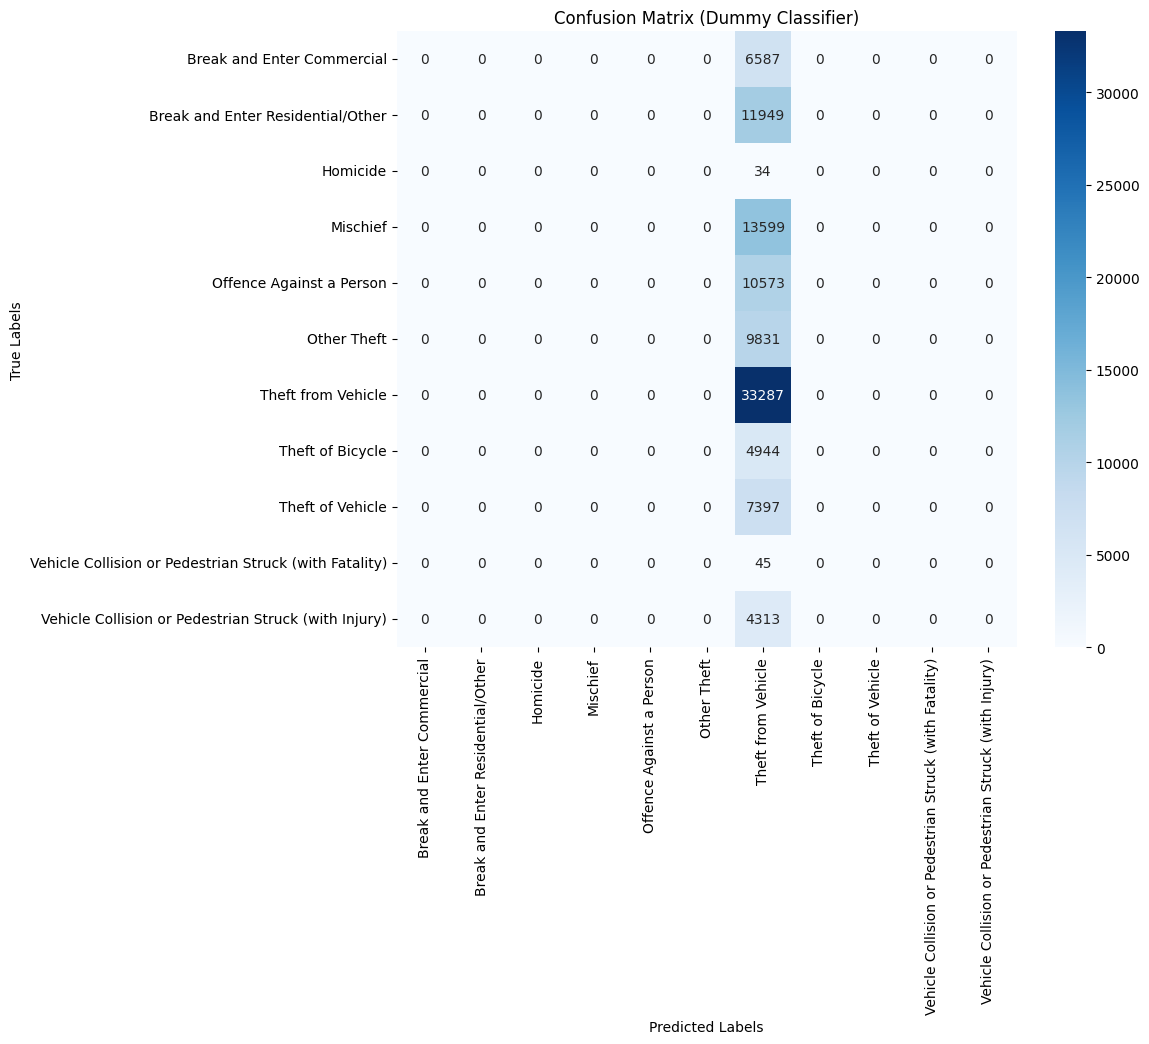

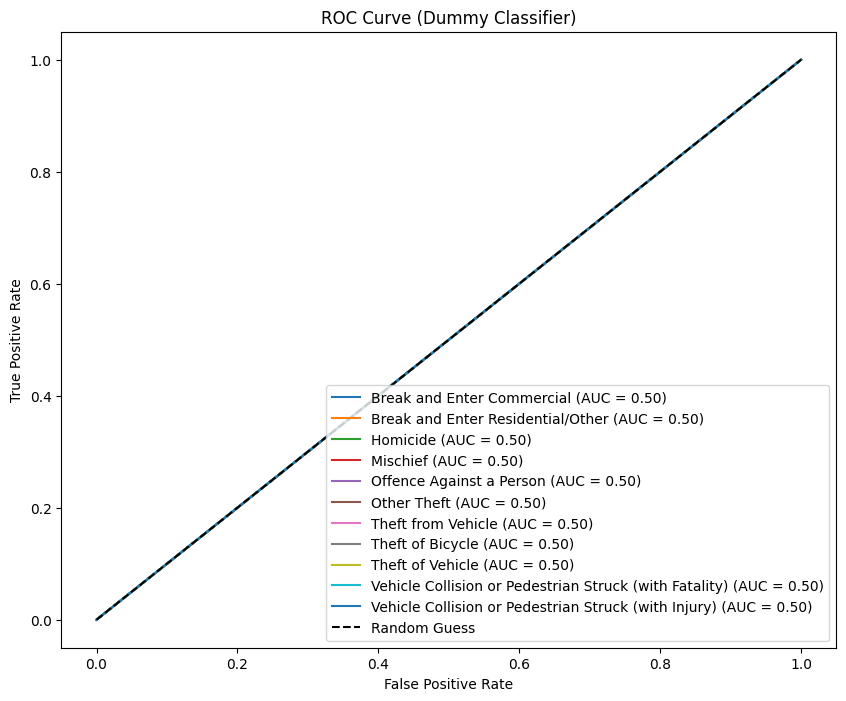

Training and evaluating: Logistic Regression
Accuracy (Logistic Regression): 43.79%

Classification Report:


/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.30      0.10      0.15      6587
                     Break and Enter Residential/Other       0.33      0.19      0.24     11949
                                              Homicide       0.00      0.00      0.00        34
                                              Mischief       0.25      0.05      0.08     13599
                              Offence Against a Person       1.00      1.00      1.00     10573
                                           Other Theft       0.32      0.13      0.19      9831
                                    Theft from Vehicle       0.39      0.88      0.54     33287
                                      Theft of Bicycle       0.23      0.01      0.02      4944
                                      Theft of Vehicle       0.00      0.00      0.00      7397
Vehicle Collision or Pedestrian Struck 

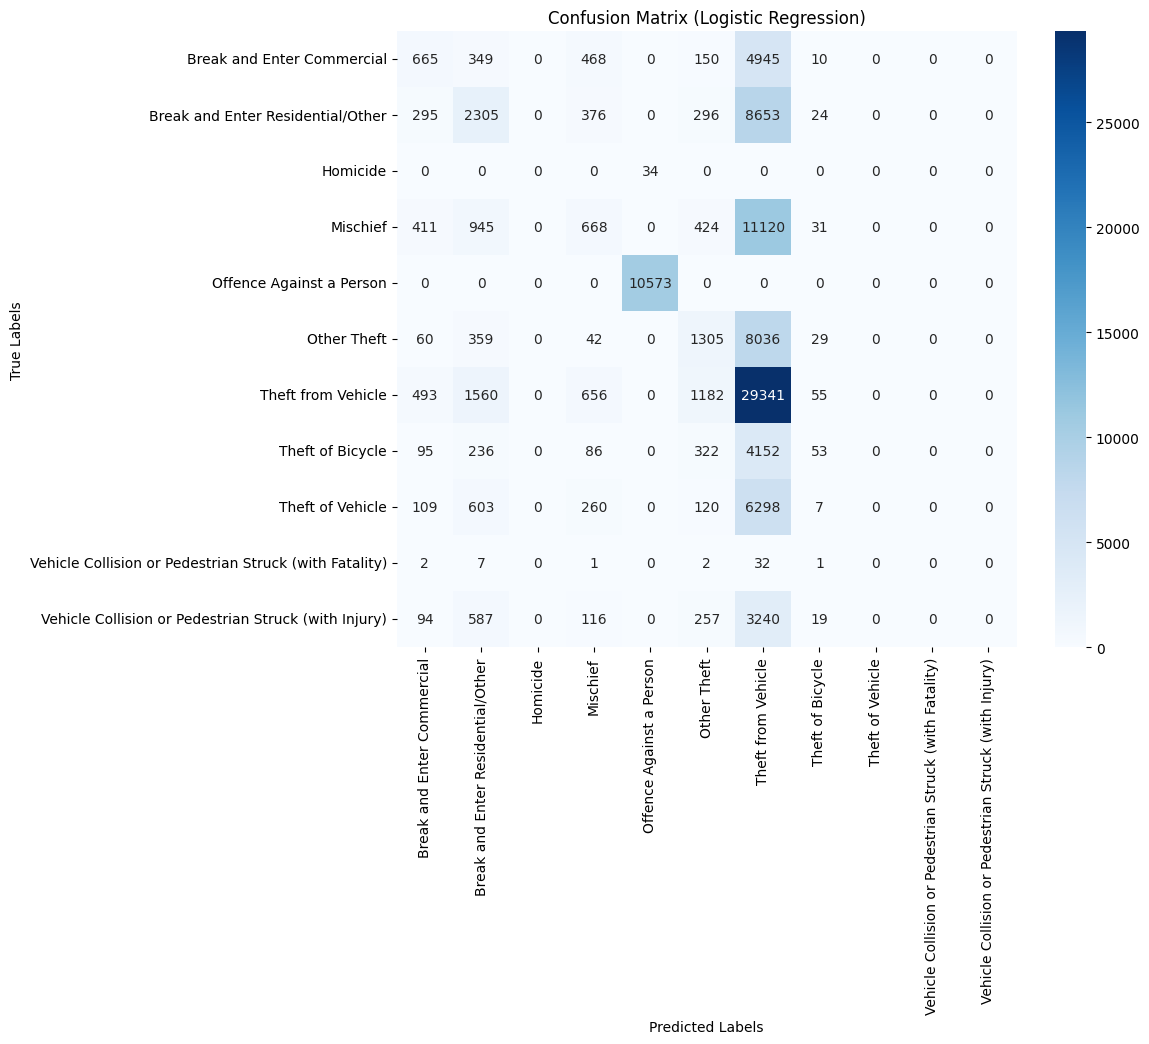

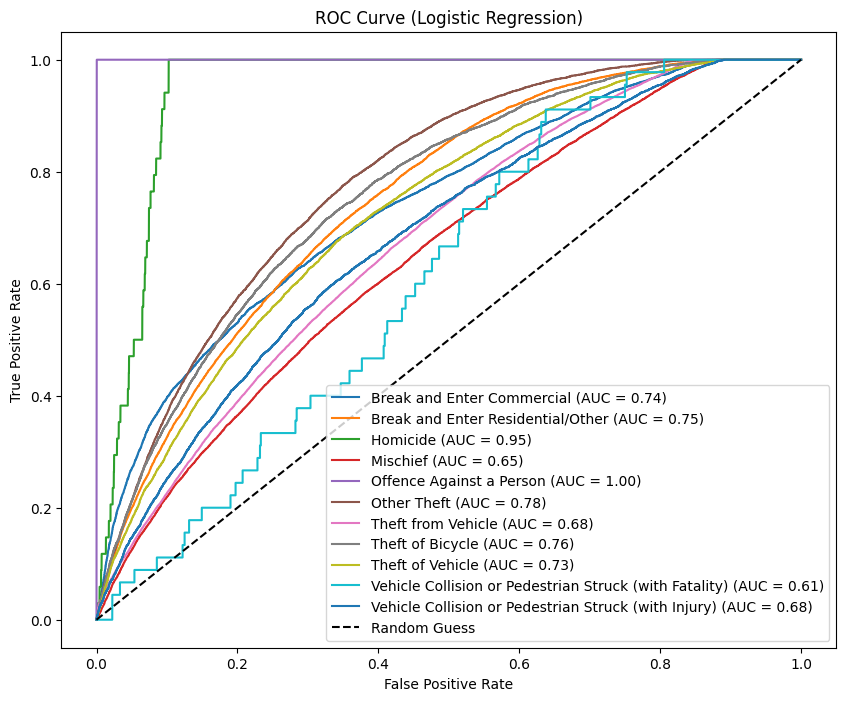

Training and evaluating: Random Forest
Accuracy (Random Forest): 48.83%

Classification Report:


/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.35      0.21      0.26      6587
                     Break and Enter Residential/Other       0.35      0.33      0.34     11949
                                              Homicide       0.00      0.00      0.00        34
                                              Mischief       0.27      0.16      0.20     13599
                              Offence Against a Person       1.00      1.00      1.00     10573
                                           Other Theft       0.69      0.63      0.66      9831
                                    Theft from Vehicle       0.45      0.74      0.56     33287
                                      Theft of Bicycle       0.28      0.09      0.14      4944
                                      Theft of Vehicle       0.20      0.07      0.10      7397
Vehicle Collision or Pedestrian Struck 

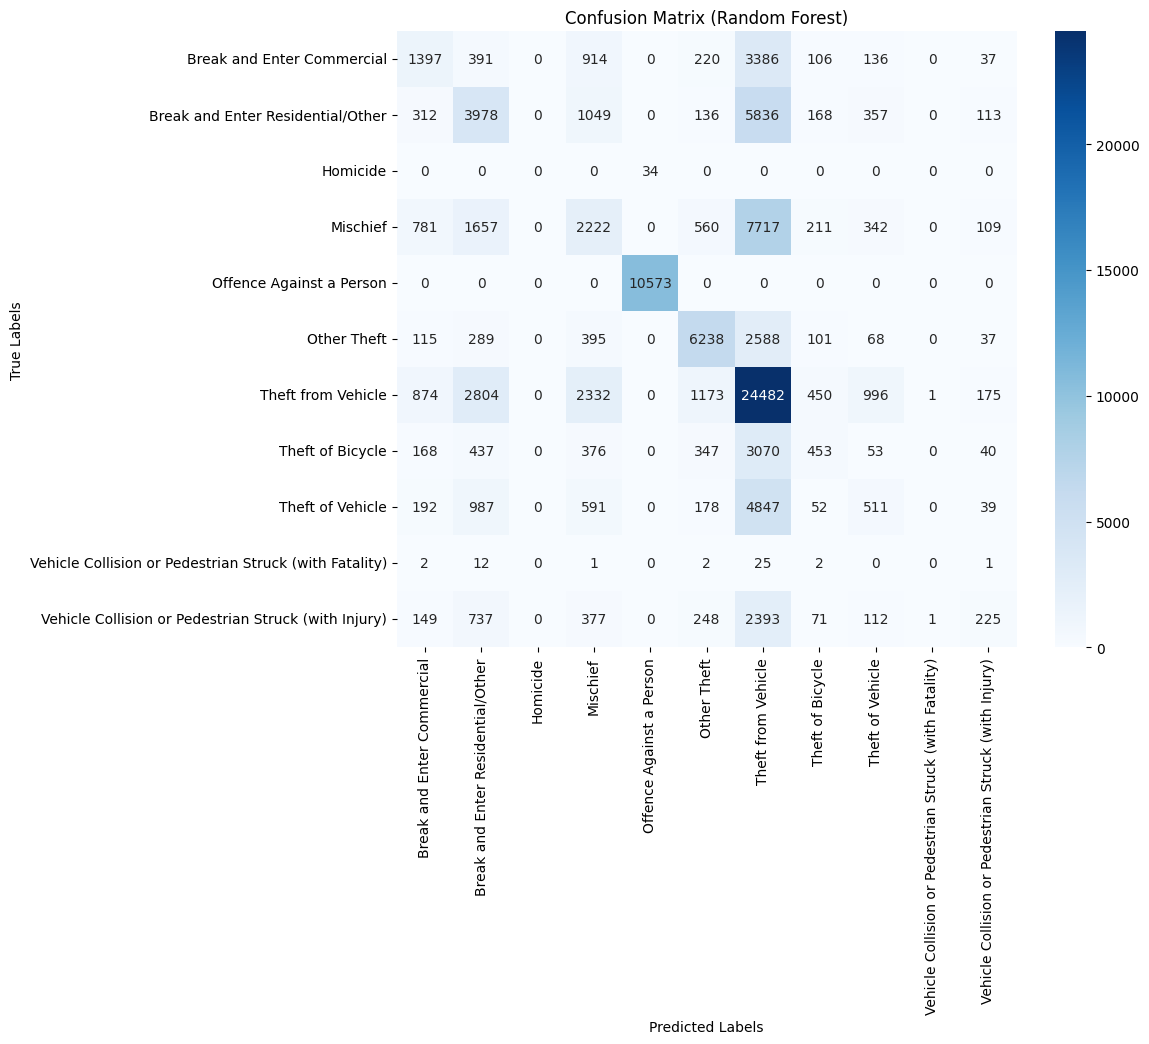

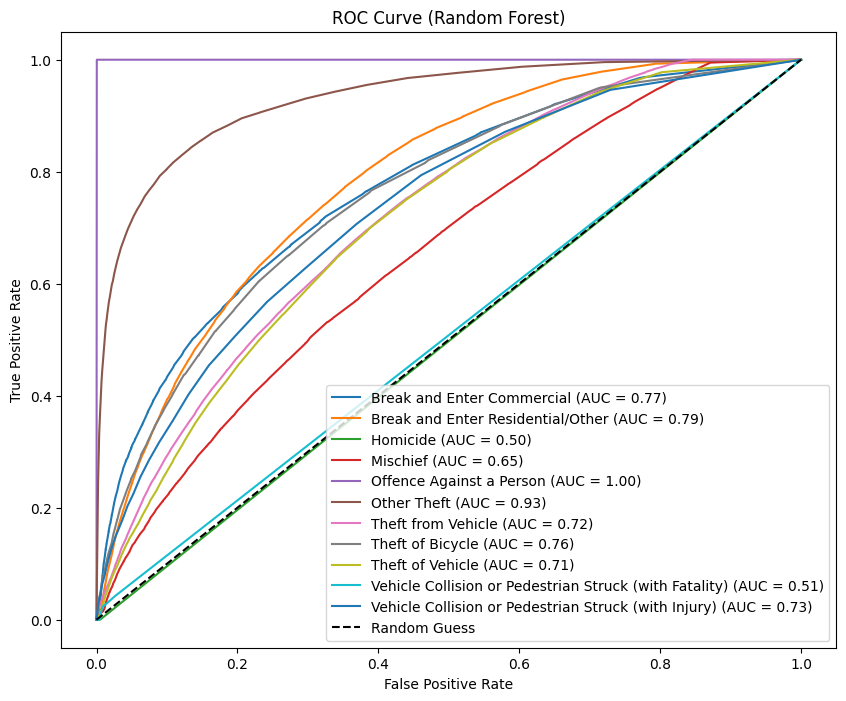

Training and evaluating: Decision Tree
Accuracy (Decision Tree): 44.11%

Classification Report:


/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.26      0.27      0.27      6587
                     Break and Enter Residential/Other       0.30      0.30      0.30     11949
                                              Homicide       0.00      0.00      0.00        34
                                              Mischief       0.21      0.22      0.22     13599
                              Offence Against a Person       1.00      1.00      1.00     10573
                                           Other Theft       0.75      0.75      0.75      9831
                                    Theft from Vehicle       0.49      0.48      0.49     33287
                                      Theft of Bicycle       0.17      0.18      0.18      4944
                                      Theft of Vehicle       0.14      0.15      0.15      7397
Vehicle Collision or Pedestrian Struck 

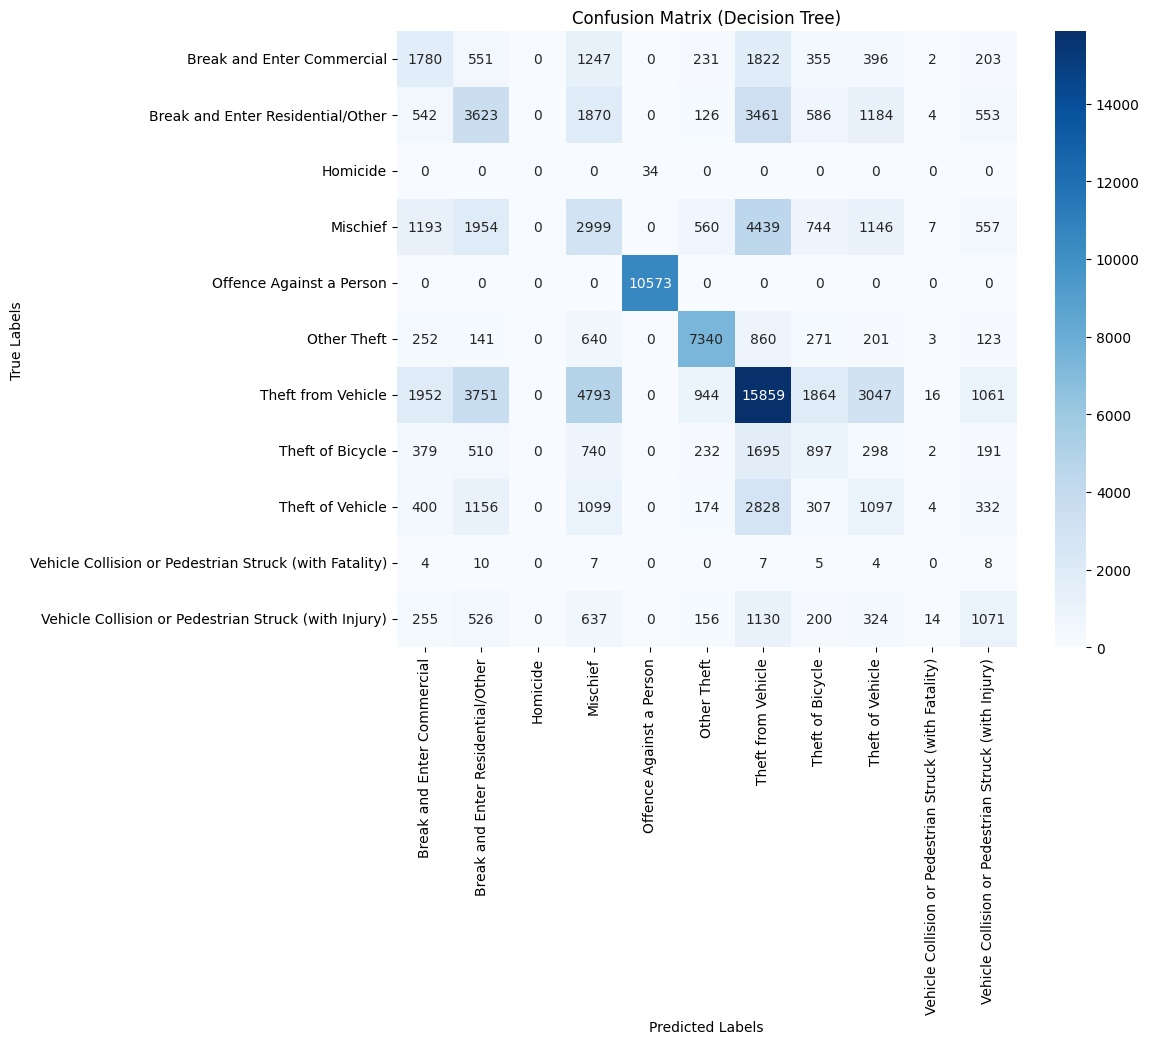

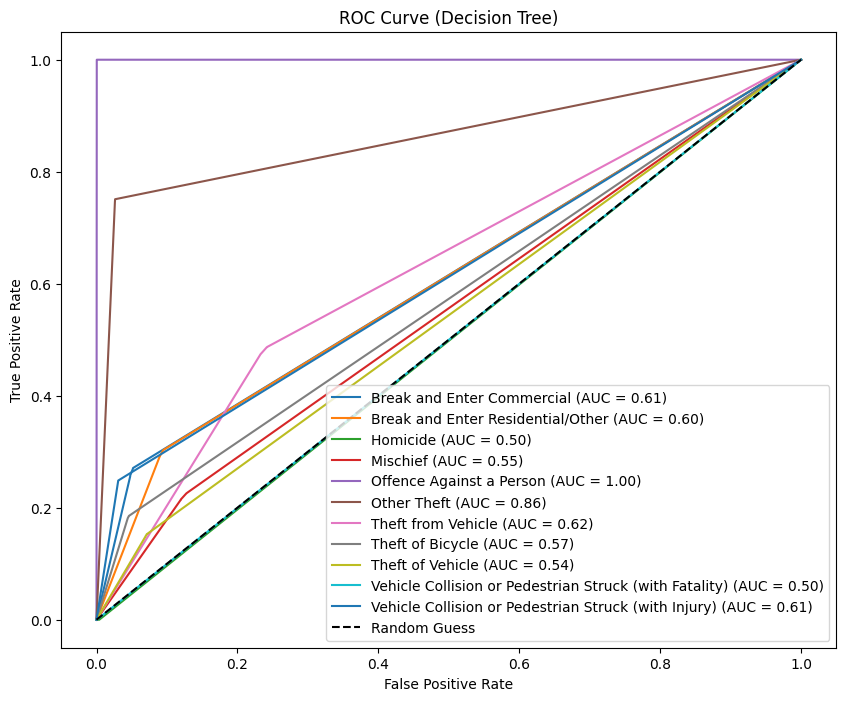

Training and evaluating: Neural Network
Accuracy (Neural Network): 45.03%

Classification Report:


/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rocky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                        precision    recall  f1-score   support

                            Break and Enter Commercial       0.33      0.19      0.24      6587
                     Break and Enter Residential/Other       0.34      0.25      0.29     11949
                                              Homicide       0.00      0.00      0.00        34
                                              Mischief       0.35      0.06      0.10     13599
                              Offence Against a Person       1.00      1.00      1.00     10573
                                           Other Theft       0.33      0.21      0.26      9831
                                    Theft from Vehicle       0.40      0.85      0.55     33287
                                      Theft of Bicycle       0.23      0.01      0.03      4944
                                      Theft of Vehicle       0.28      0.01      0.02      7397
Vehicle Collision or Pedestrian Struck 

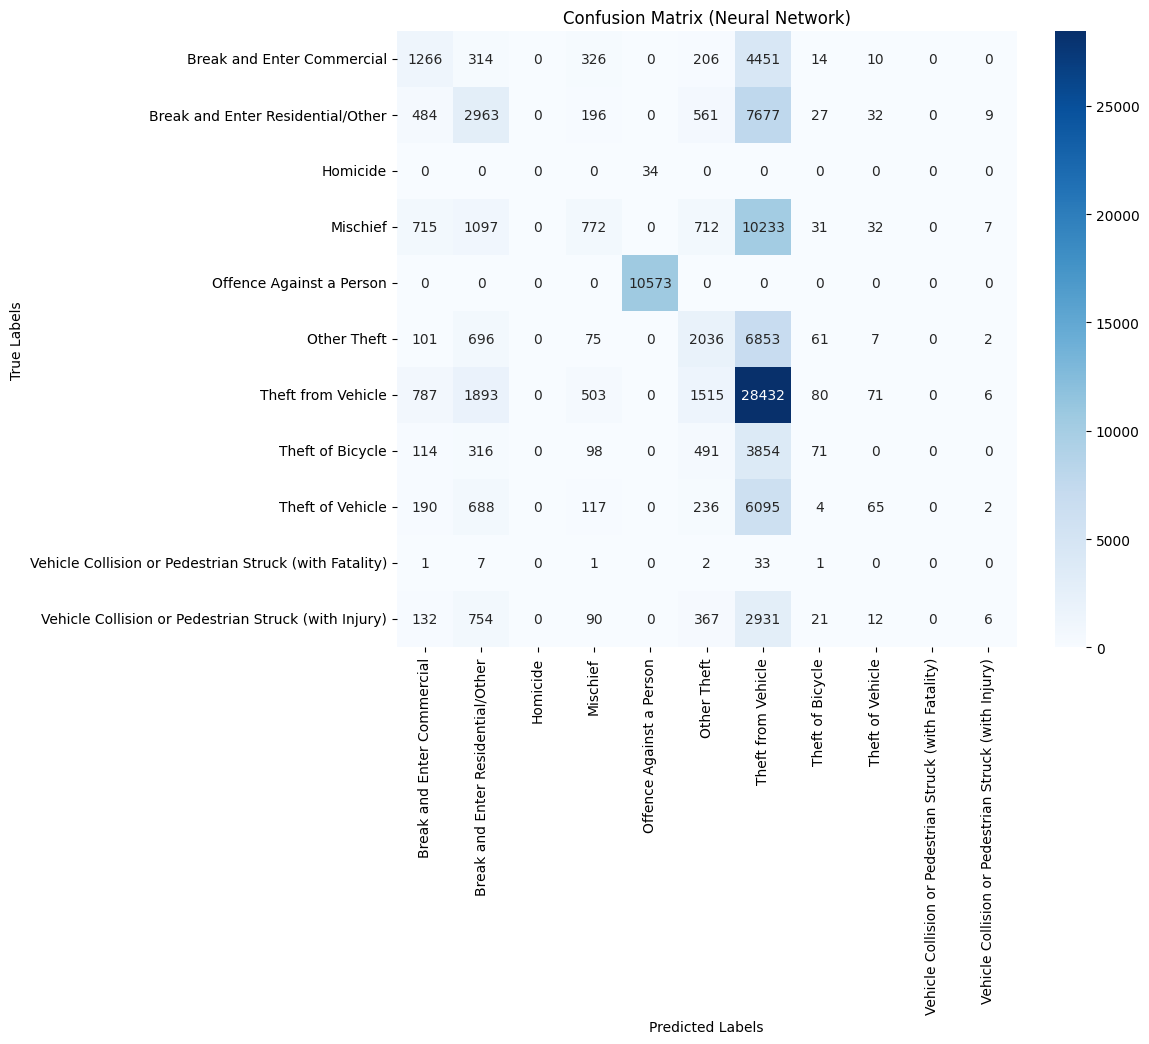

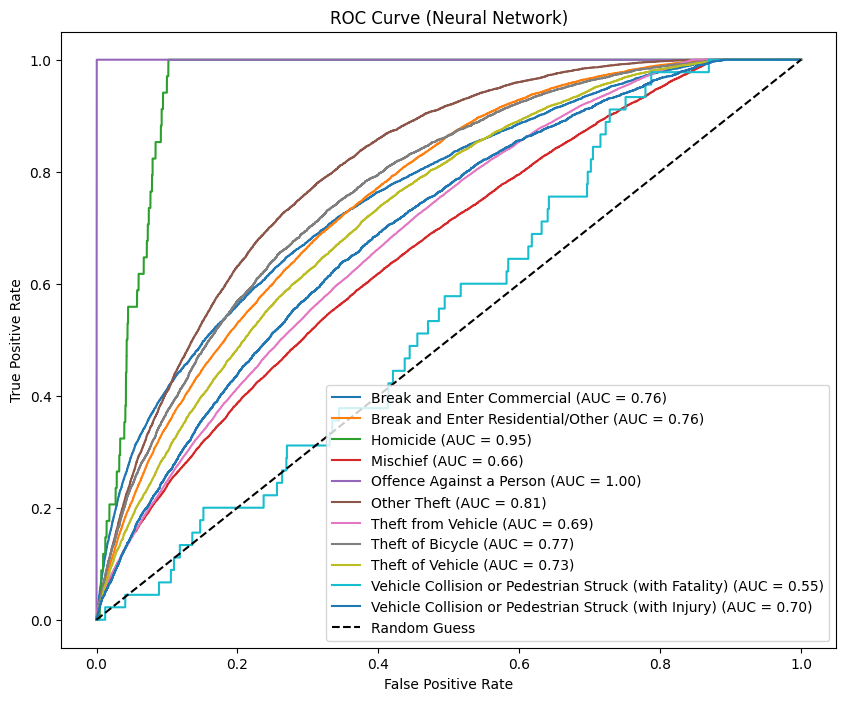


Model Performance Comparison:
Dummy Classifier: 32.46%
Logistic Regression: 43.79%
Random Forest: 48.83%
Decision Tree: 44.11%
Neural Network: 45.03%


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Define all models, including DummyClassifier
models = {
    "Dummy Classifier": DummyClassifier(strategy="most_frequent"),  # Baseline model
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
}

# Dictionary to store the results
results = {}

# Loop through each model for training and evaluation
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    
    # Create a Pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Map true labels and predicted labels to original category names
    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    results[model_name] = accuracy
    
    # Print the accuracy
    print(f"Accuracy ({model_name}): {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Check if model supports predict_proba (required for ROC curve)
    if hasattr(model, "predict_proba"):
        # Binarize the test labels for multi-class ROC curve
        y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
        
        # Get predicted probabilities
        y_score = pipeline.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = {}
        tpr = {}
        roc_auc = {}

        for i in range(len(label_encoder.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves for each class
        plt.figure(figsize=(10, 8))
        for i, class_name in enumerate(label_encoder.classes_):
            plt.plot(fpr[i], tpr[i], label=f"{class_name} (AUC = {roc_auc[i]:.2f})")
        
        # Plot diagonal
        plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
        plt.title(f"ROC Curve ({model_name})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

# Compare the results
print("\nModel Performance Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


                Feature  Importance
4              Latitude    0.215369
5             Longitude    0.192932
2                   DAY    0.123410
3                  HOUR    0.098687
0                  YEAR    0.094633
1                 MONTH    0.064065
35    NEIGHBOURHOOD_N/A    0.021402
6      DayOfWeek_Friday    0.012021
12  DayOfWeek_Wednesday    0.011998
11    DayOfWeek_Tuesday    0.011975


/tmp/ipykernel_5318/3529180680.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="viridis")


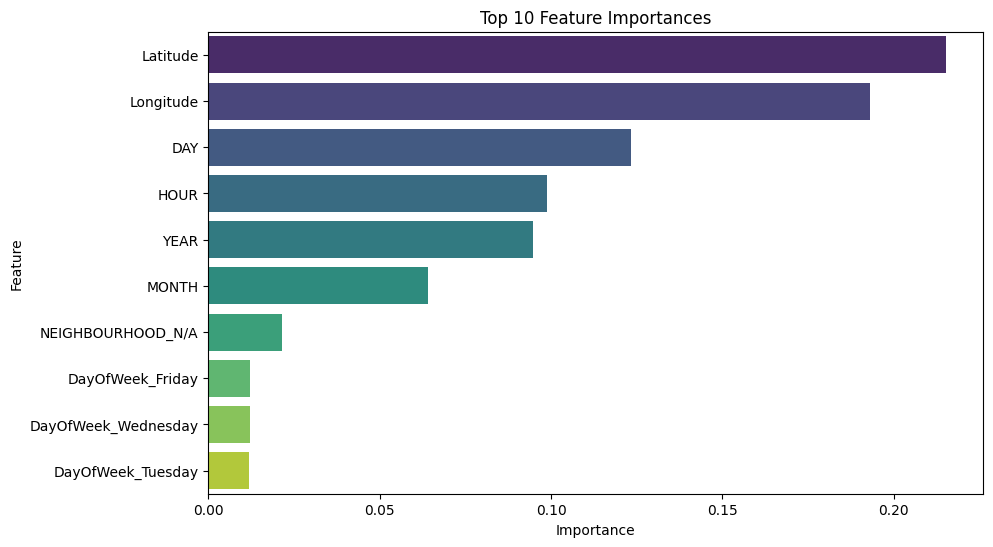

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the TYPE column
label_encoder = LabelEncoder()
df_crime['TYPE'] = label_encoder.fit_transform(df_crime['TYPE'])

# Define features and target
X = df_crime.drop(columns=["TYPE"])
y = df_crime["TYPE"]

# Select numerical and categorical features
numerical_features = ["YEAR", "MONTH", "DAY", "HOUR", "Latitude", "Longitude"]
categorical_features = ["DayOfWeek", "Season", "TimeOfDay", "NEIGHBOURHOOD"]

# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("label", OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_model)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Extract feature names
numerical_feature_names = numerical_features
categorical_feature_names = pipeline.named_steps["preprocessor"].transformers_[1][1]["label"].get_feature_names_out(categorical_features).tolist()
all_feature_names = numerical_feature_names + categorical_feature_names

# Extract feature importances from the trained model
feature_importances = pipeline.named_steps["classifier"].feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Print top features
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
